**Natural Langauage Processing
 Pipeline**

1. Text Information 
2. Segementation and Transformation 
3. Text Cleaning 
4. Vectorization and Feature Engineering 
5. Text Lemmatization and Steaming 
6. Machine Learning/Deeplearning Algorithm 
7. Interpreatation of the Result

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-02 07:08:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-02 07:08:33 (99.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-01-02 07:08:36--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.81.208, 142.250.188.48, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-01-02 07:08:36 (137 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#checking the value counts of the target 
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

From above we can see the our data is almost balanced i.e negative class(target = 0) is 60% and positive class (target = 1) 

Where 0 - real disaster tweet
      1 - fake disaster tweet

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [ ]:
#lets visualize some samples to have look at our data

import random

# create random indexes not higher than the total number of samples
random_index = random.randint(0, len(train_df)-5) 

for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
#earthquake (EMSC): MD 2.9 OFF COAST OF NORTHERN CALIFORNIA http://t.co/6AiMd1uway G http://t.co/9cgbJwmhII

---

Target: 0 (not real disaster)
Text:
3 Things All Affiliate Marketers Need To Survive Online - Every affiliate marketer is always... http://t.co/kPMYqUJSUE

---

Target: 1 (real disaster)
Text:
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/EdEKrmqTpQ

---

Target: 1 (real disaster)
Text:
Crews working to restore power in southwest Omaha after vehicle collided with utility pole. - http://t.co/dAn0Gkx28l

---

Target: 0 (not real disaster)
Text:
Angry Woman Openly Accuses NEMA Of Stealing Relief Materials Meant For IDPs: An angry Internally Displaced wom... http://t.co/Khd99oZ7u3

---



In [ ]:
from sklearn.model_selection import train_test_split

# Splitting training data into train and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, 
                                                                            random_state=42) 

In [ ]:
# Check the lengths of all the above labels
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

### Text vectorization (tokenization)



To tokenize our words, we'll use the helpful preprocessing layer [`tf.keras.layers.experimental.preprocessing.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization).

The `TextVectorization` layer takes the following parameters:
* `max_tokens` - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens. 
* `standardize` - Method for standardizing text. Default is `"lower_and_strip_punctuation"` which lowers text and removes all punctuation marks.
* `split` - How to split text, default is `"whitespace"` which splits on spaces.
* `ngrams` - How many words to contain per token split, for example, `ngrams=2` splits tokens into continuous sequences of 2.
* `output_mode` -  How to output tokens, can be `"int"` (integer mapping), `"binary"` (one-hot encoding), `"count"` or `"tf-idf"`. See documentation for more.
* `output_sequence_length` - Length of tokenized sequence to output. For example, if `output_sequence_length=150`, all tokenized sequences will be 150 tokens long.
* `pad_to_max_tokens` - Defaults to `False`, if `True`, the output feature axis will be padded to `max_tokens` even if the number of unique tokens in the vocabulary is less than `max_tokens`. Only valid in certain modes, see docs for more.
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization



 **Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
we can use: "tf.keras.layers.**

TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

Use the default TextVectorization variables


```
text_vectorizer = TextVectorization(
max_tokens=None,  # how many words in the vocabulary all the different words in your text   
standardize="lower_and_strip_punctuation",  #how to process text
split="whitespace",   # how to split tokens
ngrams=None,   # create groups of n-words?
output_mode="int",   # how to map tokens to numbers
output_sequence_length=None,   #how long should the output sequence of tokens be?
pad_to_max_tokens=True)   # Not valid if using max_tokens=None
```



In [ ]:
#find the average no of token(words) in training Tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
#creating out custom text vectorisation model 
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 10000 #max number of words to have in our vocab 
max_length = 15 #max lenth our model will be shown of tweets

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
#Let's create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

So we can see from above that our text vectorizer is working great as word level tokenization and also we are padding the text with 0 as we set in code the max lenght of senentce feeded to model.

In [ ]:
#let check some randome sample from train dataset
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
the fall of leaves from a poplar is as fully ordained as the tumbling of an avalanche - Spurgeon      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   2,  278,    6, 2903,   20,    3, 4887,    9,   26, 1408,    1,
          26,    2, 7312,    6]])>

In [ ]:
#lets check our vocabulary using get_vocabulary() method

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Word Embedding using an Embedding Layer

We've got a way to map our text to numbers. 
Now lets create an embdedding layer

An embedding ilayer weights can be learned during training. This means rather than just being static (e.g. `1` = I, `2` = love, `3` = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer. 

The main parameters we're concerned about here are:
* `input_dim` - The size of the vocabulary (e.g. `len(text_vectorizer.get_vocabulary()`).
* `output_dim` - The size of the output embedding vector, for example, a value of `100` outputs a  feature vector of size 100 for each word.
* `embeddings_initializer` - How to initialize the embeddings matrix, default is `"uniform"` which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` - Length of sequences being passed to embedding layer.

Knowing these, let's make an embedding layer.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
What really happened in the Taken King Story Trailer. A space battle that ripped a hole in Saturn. @EyTay @neur0sis http://t.co/ZYRZX6dfki      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01456394,  0.02664156, -0.0070488 , ...,  0.00958163,
         -0.01225308,  0.04130488],
        [ 0.04385186,  0.03348636, -0.02515814, ...,  0.00960597,
          0.01970066, -0.03117456],
        [ 0.02563855, -0.00849898,  0.02899616, ...,  0.02587763,
          0.00313853,  0.01257442],
        ...,
        [ 0.02277004, -0.04287119,  0.01870605, ...,  0.04251286,
          0.04716172, -0.0266092 ],
        [-0.00094712, -0.03146295,  0.0372755 , ..., -0.02307394,
          0.02388395, -0.01714142],
        [-0.04284013, -0.01489798, -0.0159496 , ..., -0.01166106,
          0.03061062,  0.01972148]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01456394,  0.02664156, -0.0070488 , -0.01578101,  0.01857844,
       -0.03789372, -0.02296357,  0.04445826,  0.00534431, -0.04086939,
       -0.0001178 ,  0.0325787 ,  0.01795044, -0.00840222,  0.02777113,
        0.00267535,  0.00249401, -0.02981182,  0.00419725, -0.01612579,
       -0.04731787, -0.00343758, -0.01875019,  0.0197308 ,  0.02892964,
        0.02087852,  0.0311374 , -0.02340465, -0.02849378,  0.0206467 ,
        0.02238199,  0.03973413,  0.02957373, -0.02066603,  0.00601099,
        0.01802809,  0.03249015, -0.03012767,  0.00128162,  0.03171993,
        0.02708571,  0.0370943 ,  0.02782694,  0.01861149, -0.00639851,
       -0.04907566, -0.01623199, -0.03895655,  0.0074303 ,  0.02819103,
        0.03139831,  0.02758573, -0.0115862 , -0.03698015, -0.0286014 ,
       -0.01950072,  0.03606139, -0.00383686, -0.00495111,  0.02097936,
        0.04864902, -0.00507084, -0.04891219,  0.03100859, -0.04584966,
       -0.046618

# Model Building

Here we will be making following models for our problem

* **Model 0**: Naive Bayes (baseline)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Same as model 6 with 10% of training data



In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

### Model 0 : Navie Bayes Model 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 

model_0 = Pipeline (
    [
          ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
     
    ])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
#let check the accuracy of our model

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)

#finding model accuracy
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1 : A Simple Dense Model 

In [ ]:
 # Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype = "string") #taking input as strings
x = text_vectorizer(inputs) #turning text into nos 
x = embedding(x) #create embedding numbers 
x = layers.GlobalAveragePooling1D()(x) #To Lower the dimenson of embedding 
outputs = layers.Dense(1,activation="sigmoid")(x) #create the dense layer

model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1.summary()


Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220102-101234
Epoch 1/5
215/215 [==============================] - 6s 24ms/step - loss: 0.6096 - accuracy: 0.6944 - val_loss: 0.5363 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4413 - accuracy: 0.8194 - val_loss: 0.4693 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3464 - accuracy: 0.8610 - val_loss: 0.4590 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2849 - accuracy: 0.8915 - val_loss: 0.4641 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2380 - accuracy: 0.9127 - val_loss: 0.4764 - val_accuracy: 0.7874


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7874


[0.47642412781715393, 0.787401556968689]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.00202856, -0.02155778,  0.00275221, ..., -0.0422562 ,
         -0.00822866,  0.01538815],
        [ 0.03533823, -0.04215356, -0.03016877, ..., -0.00355751,
          0.02705194,  0.03206429],
        [ 0.01182706,  0.01262978,  0.02917519, ..., -0.06003303,
         -0.04364321,  0.01338253],
        ...,
        [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
          0.00308807,  0.02215792],
        [ 0.00788765, -0.02609354,  0.05236164, ..., -0.05528514,
         -0.01142916,  0.04141686],
        [-0.03701389, -0.07432979,  0.05488915, ..., -0.02050988,
         -0.08764114,  0.02116849]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

array([[0.41302985],
       [0.74585366],
       [0.9977267 ],
       [0.10819986],
       [0.10324275],
       [0.93573475],
       [0.9114057 ],
       [0.99308753],
       [0.9687748 ],
       [0.26211113]], dtype=float32)

In [ ]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'f1': 0.7846966492209201,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497}

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "First deep model on text data" \
  --description "Trying a dense model with an embedding layer" \
  --one_shot # exits the uploader when upload has finished


# If we need to remove previous experiments, we can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

2022-01-02 13:31:25.093810: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%



> **Oragne** - Train


> **Blue** - Validation 






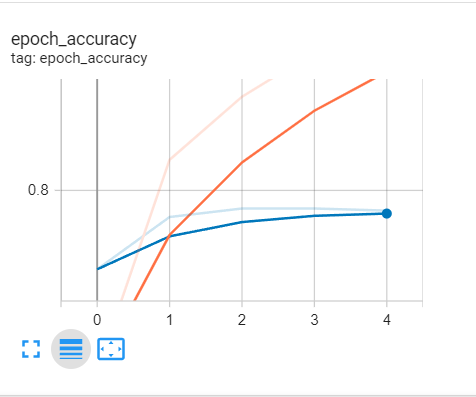



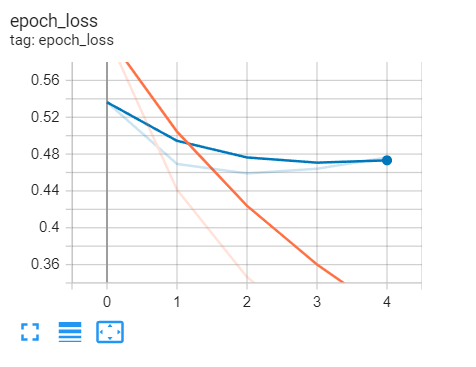

## Visualizing learned embeddings

Our first model (`model_1`) contained an embedding layer (`embedding`) which learned a way of representing words as feature vectors by passing over the training data.

We can get those weights and visualise them for more better understanding.

We will be using [Embedding Projector tool](http://projector.tensorflow.org/_) by tensorflow.


To use the Embedding Projector tool, we need two files:
* The embedding vectors (same as embedding weights).
* The meta data of the embedding vectors (the words they represent - our vocabulary).


to get above file we're going to [use the code example available on the TensorFlow word embeddings tutorial page](https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk)

In [49]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [48]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


In [50]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Once we got our Vector and Metadata files we can upload the data on  [Embedding Projector tool](http://projector.tensorflow.org/_)  to visualise 

## Model 2 : LSTM Model 

In [53]:
# Setting Random Seed for Reproducibility and creating new embedding for LSTM network 
tf.random.set_seed(42)
from tensorflow.keras import layers 
lstm_model_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_lstm"
)

#LSTM model 
input = layers.Input(shape=(1,),dtype = 'string')
x = text_vectorizer(inputs)
x = lstm_model_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")







(None, 15, 128)
(None, 64)


In [54]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_lstm (Embedding)  (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [61]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=50,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20220102-163639
Epoch 1/50
215/215 [==============================] - 9s 43ms/step - loss: 0.0373 - accuracy: 0.9820 - val_loss: 1.6315 - val_accuracy: 0.7507
Epoch 2/50
215/215 [==============================] - 8s 37ms/step - loss: 0.0372 - accuracy: 0.9828 - val_loss: 1.6942 - val_accuracy: 0.7428
Epoch 3/50
215/215 [==============================] - 5s 24ms/step - loss: 0.0320 - accuracy: 0.9837 - val_loss: 1.8462 - val_accuracy: 0.7428
Epoch 4/50
215/215 [==============================] - 5s 24ms/step - loss: 0.0357 - accuracy: 0.9828 - val_loss: 1.2221 - val_accuracy: 0.7388
Epoch 5/50
215/215 [==============================] - 5s 25ms/step - loss: 0.0383 - accuracy: 0.9815 - val_loss: 1.3730 - val_accuracy: 0.7559
Epoch 6/50
215/215 [==============================] - 5s 24ms/step - loss: 0.0376 - accuracy: 0.9831 - val_loss: 1.4168 - val_accuracy: 0.7441
Epoch 7/50
215/215 [==============================] - 5s 25ms/step - loss: 0.

In [62]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

((762, 1), array([[1.0619968e-02],
        [9.8938227e-01],
        [9.9999589e-01],
        [4.5016408e-04],
        [2.4956773e-06],
        [9.9999607e-01],
        [2.4256706e-03],
        [1.0000000e+00],
        [9.9999571e-01],
        [7.2410703e-04]], dtype=float32))

In [63]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [64]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 74.1469816272966,
 'f1': 0.7398677207095616,
 'precision': 0.7414498796209074,
 'recall': 0.7414698162729659}

In [65]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 74.15, Difference: -5.12
Baseline precision: 0.81, New precision: 0.74, Difference: -0.07
Baseline recall: 0.79, New recall: 0.74, Difference: -0.05
Baseline f1: 0.79, New f1: 0.74, Difference: -0.05
